## CS 445: Computational Photography

## Programming Project #3: Gradient Domain Fusion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import random
import time
import scipy
import scipy.sparse.linalg

# modify to where you store your project data including utils.py
datadir = "/content/drive/My Drive/cs445_projects/proj3/"

utilfn = datadir + "utils.py"
!cp "$utilfn" .
samplesfn = datadir + "samples"
!cp -r "$samplesfn" .
import utils

## Part 1 Toy Problem (20 pts)

In [ ]:
def toy_reconstruct(img):
    """
    The implementation for gradient domain processing is not complicated, but it is easy to make a mistake, so let's start with a toy example. Reconstruct this image from its gradient values, plus one pixel intensity. Denote the intensity of the source image at (x, y) as s(x,y) and the value to solve for as v(x,y). For each pixel, then, we have two objectives:
    1. minimize (v(x+1,y)-v(x,y) - (s(x+1,y)-s(x,y)))^2
    2. minimize (v(x,y+1)-v(x,y) - (s(x,y+1)-s(x,y)))^2
    Note that these could be solved while adding any constant value to v, so we will add one more objective:
    3. minimize (v(1,1)-s(1,1))^2

    :param toy_img: numpy.ndarray
    """
    im_h, im_w = img.shape
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w)

    # Initialize equation counter and system size
    num_eq = im_h * (im_w - 1) + (im_h - 1) * im_w + 1
    A = scipy.sparse.lil_matrix((num_eq, im_h * im_w))
    b = np.zeros(num_eq)

    e = -1 # Equation counter
    # Add horizontal gradient equations
    for y in range(im_h):
        for x in range(im_w - 1):  # Avoid the last column
            e += 1
            A[e, im2var[y][x + 1]] = 1
            A[e, im2var[y][x]] = -1
            b[e] = img[y][x + 1] - img[y][x]

    # Add vertical gradient equations
    for y in range(im_h - 1):  # Avoid the last row
        for x in range(im_w):
            e += 1
            A[e, im2var[y + 1][x]] = 1
            A[e, im2var[y][x]] = -1
            b[e] = img[y + 1][x] - img[y][x]

    e += 1
    A[e, im2var[0][0]] = 1
    b[e] = img[0][0]

    A = A.tocsr()

    v = scipy.sparse.linalg.lsqr(A, b, atol=1e-8, btol=1e-8)[0]

    reconstructed_img = np.zeros((im_h, im_w))

    for y in range(im_h):
        for x in range(im_w):
            reconstructed_img[y, x] = v[im2var[y][x]]

    return reconstructed_img



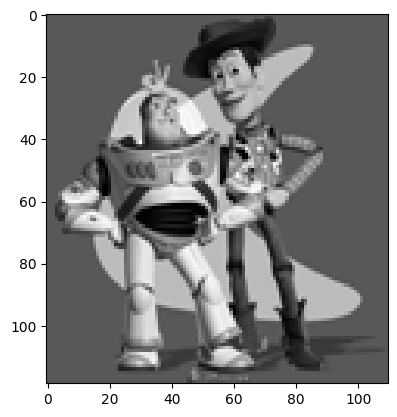

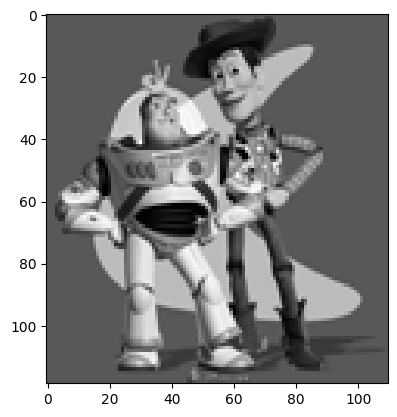

Max error is:  8.073677220055142e-06


In [ ]:
toy_img = cv2.cvtColor(cv2.imread('samples/toy_problem.png'), cv2.COLOR_BGR2GRAY).astype('double') / 255.0
plt.imshow(toy_img, cmap="gray")
plt.show()

im_out = toy_reconstruct(toy_img)
plt.imshow(im_out, cmap="gray")
plt.show()
print("Max error is: ", np.sqrt(((im_out - toy_img)**2).max()))

## Preparation

In [ ]:
# Example fix inside utils.get_mask or any similar function
from skimage import draw
import numpy as np
import matplotlib.pyplot as plt
def poly2mask(vertex_row_coords, vertex_col_coords, shape):
    fill_row_coords, fill_col_coords = draw.polygon(vertex_row_coords, vertex_col_coords, shape)
    mask = np.zeros(shape, dtype=bool)
    mask[fill_row_coords, fill_col_coords] = True
    return mask

def get_mask(ys, xs, img):
    mask = poly2mask(ys, xs, img.shape[:2]).astype(int)
    fig = plt.figure()
    plt.imshow(mask, cmap='gray')
    return mask

def specify_mask(img):
    # get mask
    print("If it doesn't get you to the drawing mode, then rerun this function again.")
    fig = plt.figure()
    fig.set_label('Draw polygon around source object')
    plt.axis('off')
    plt.imshow(img, cmap='gray')
    xs = []
    ys = []
    clicked = []


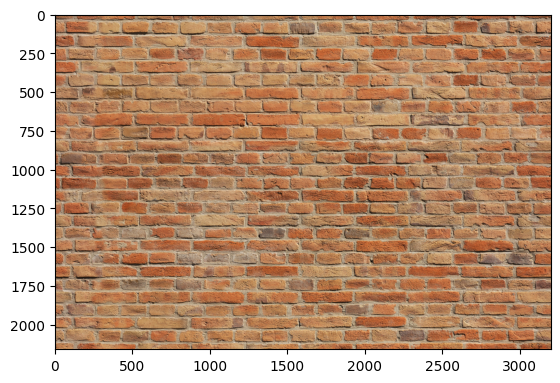

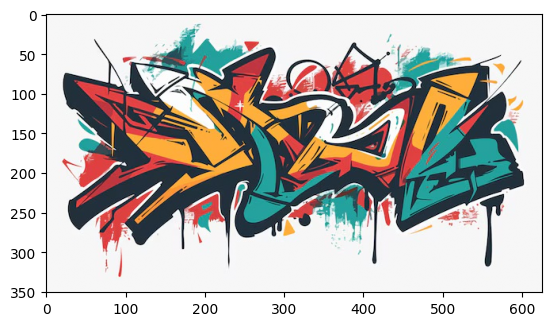

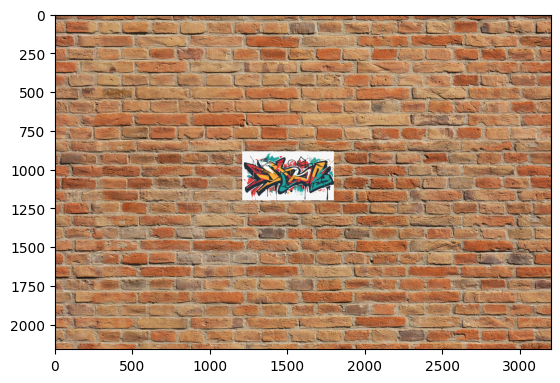

In [ ]:
# background_img = cv2.cvtColor(cv2.imread('samples/camp2.jpg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
background_img = cv2.cvtColor(cv2.imread('samples/brickwall.jpg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/graffitti.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
# object_img = cv2.cvtColor(cv2.imread('samples/bear.jpg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0
plt.imshow(object_img)
plt.show()

use_interface = False  # set to true if you want to use the interface to choose points (might not work in Colab)
if not use_interface:

  # bad example

  # xs = (100, 600, 600, 100)
  # ys = (24, 24, 400, 400)
  # object_mask = get_mask(ys, xs, object_img)
  # bottom_center = (1000, 900) # (x,y)

  # alligator coords

  # xs = (65, 200, 200, 65)
  # ys = (24, 24, 110, 110)
  # object_mask = get_mask(ys, xs, object_img)
  # bottom_center = (600, 280) # (x,y)

  # plane coords

  # xs = (20, 250, 190, 20)
  # ys = (5, 5, 60, 60)
  # object_mask = get_mask(ys, xs, object_img)
  # bottom_center = (800, 220) # (x,y)

  # penguin coordinates

  # xs = (65, 359, 359, 65)
  # ys = (24, 24, 457, 457)
  # object_mask = get_mask(ys, xs, object_img)
  # bottom_center = (500, 2500) # (x,y)

  # graffitti coordinates

  xs = (10, 600, 600, 10)
  ys = (5, 5, 320, 320)
  object_mask = get_mask(ys, xs, object_img)
  bottom_center = (1500, 1200) # (x,y)


  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))



In [ ]:
if use_interface:
  import matplotlib.pyplot as plt
  %matplotlib notebook
  mask_coords = specify_mask(object_img)

In [ ]:
if use_interface:
  xs = mask_coords[0]
  ys = mask_coords[1]
  %matplotlib inline
  import matplotlib.pyplot as plt
  plt.figure()
  object_mask = get_mask(ys, xs, object_img)

In [ ]:
if use_interface:
  %matplotlib notebook
  import matplotlib.pyplot as plt
  bottom_center = specify_bottom_center(background_img)

In [ ]:
if use_interface:
  %matplotlib inline
  import matplotlib.pyplot as plt

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))

## Part 2 Poisson Blending (50 pts)

In [ ]:
def get_neighbors(i, j):
  return [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]

def poisson_blend(object_img, object_mask, bg_img, bg_ul):
    """
    Returns a Poisson blended image with masked object_img over the bg_img at position specified by bg_ul.
    Can be implemented to operate on a single channel or multiple channels
    :param object_img: the image containing the foreground object
    :param object_mask: the mask of the foreground object in object_img
    :param background_img: the background image
    :param bg_ul: position (row, col) in background image corresponding to (0,0) of object_img
    """
    nnz = (object_mask > 0).sum()
    im2var = -np.ones(object_img.shape[0 : 2], dtype='int32')
    im2var[object_mask > 0] = np.arange(nnz)

    nonzero_rows, nonzero_cols = np.nonzero(object_mask)

    im_h, im_w = object_img.shape

    total_pixels = im_h * im_w
    total_equations = 4 * nnz

    A = scipy.sparse.lil_matrix((total_equations, nnz))
    b = np.zeros(total_equations)

    result_image = np.copy(bg_img)
    e = 0
    for n in range(nnz):

      current_row, current_col = nonzero_rows[n], nonzero_cols[n]

      for (neighbor_row, neighbor_col) in get_neighbors(current_row, current_col):

        if neighbor_row >= 0 and neighbor_row < im_h and neighbor_col >= 0 and neighbor_col < im_w:

          s_gradient = object_img[neighbor_row, neighbor_col] - object_img[current_row, current_col]

          if object_mask[neighbor_row, neighbor_col]:
              # inside mask
              A[e, im2var[current_row, current_col]] = -1
              A[e, im2var[neighbor_row, neighbor_col]] = 1
              b[e] = s_gradient
          else:
              A[e, im2var[current_row, current_col]] = 1
              b[e] = s_gradient + bg_img[neighbor_row + bg_ul[0], neighbor_col + bg_ul[1]]
        e += 1


    # Solve the least-squares problem for this channel
    v = scipy.sparse.linalg.lsqr(A.tocsr(), b, atol=1e-8, btol=1e-8)[0]

    # Copy the solved values into the background at the location specified by bg_ul
    for n in range(nnz):
        row, col = nonzero_rows[n], nonzero_cols[n]
        result_image[row + bg_ul[0], col + bg_ul[1]] = v[im2var[row, col]]

    return result_image








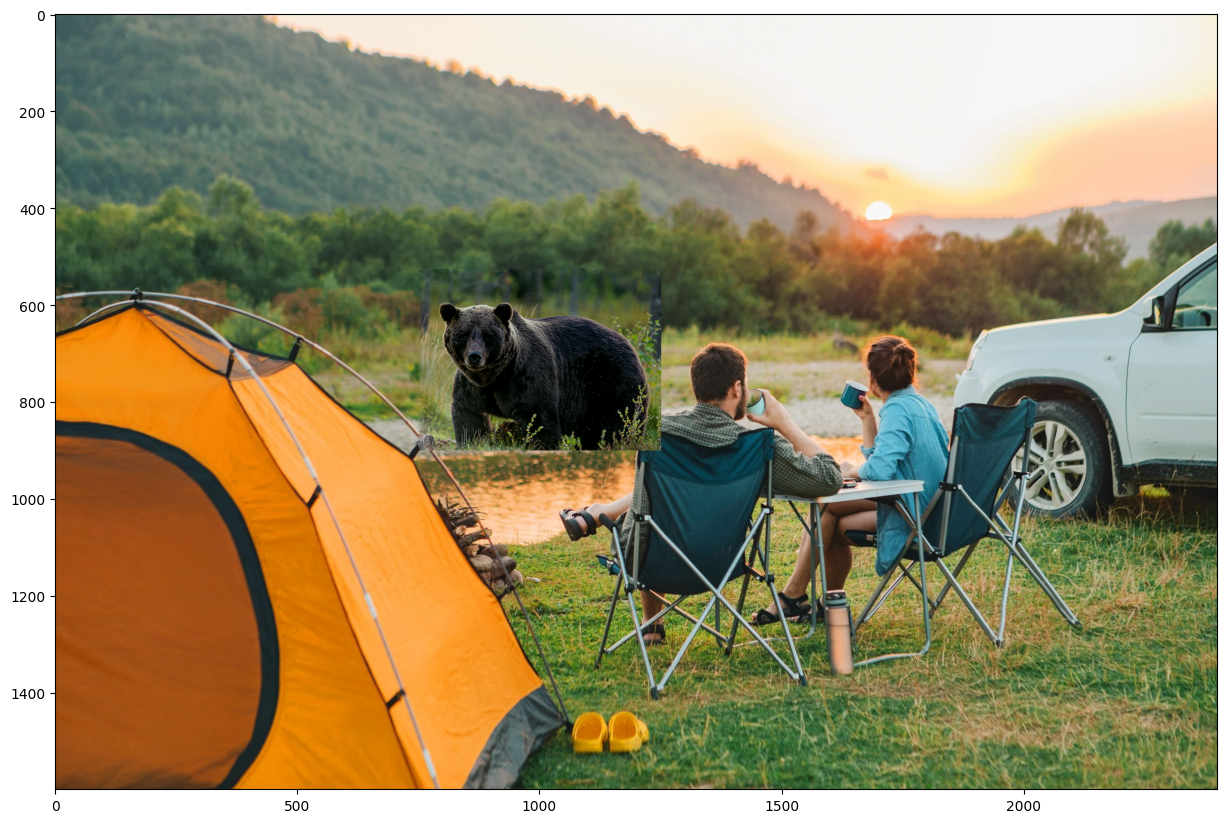

In [ ]:

im_blend = np.zeros(background_img.shape)
for b in np.arange(3):
  im_blend[:,:,b] = poisson_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)

plt.figure(figsize=(15,15))
plt.imshow(im_blend)

## Part 3 Mixed Gradients (20 pts)

In [ ]:
def get_neighbors(i, j):
  return [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]

def mixed_blend(object_img, object_mask, bg_img, bg_ul):
    """
    Returns a mixed gradient blended image with masked object_img over the bg_img at position specified by bg_ul.
    Can be implemented to operate on a single channel or multiple channels
    :param object_img: the image containing the foreground object
    :param object_mask: the mask of the foreground object in object_img
    :param background_img: the background image
    :param bg_ul: position (row, col) in background image corresponding to (0,0) of object_img
    """
    nnz = (object_mask > 0).sum()
    im2var = -np.ones(object_img.shape[0 : 2], dtype='int32')
    im2var[object_mask > 0] = np.arange(nnz)

    nonzero_rows, nonzero_cols = np.nonzero(object_mask)

    im_h, im_w = object_img.shape

    total_pixels = im_h * im_w
    total_equations = 4 * nnz

    A = scipy.sparse.lil_matrix((total_equations, nnz))
    b = np.zeros(total_equations)

    result_image = np.copy(bg_img)
    e = 0
    for n in range(nnz):

      current_row, current_col = nonzero_rows[n], nonzero_cols[n]

      for (neighbor_row, neighbor_col) in get_neighbors(current_row, current_col):

        if neighbor_row >= 0 and neighbor_row < im_h and neighbor_col >= 0 and neighbor_col < im_w:

          s_gradient = object_img[neighbor_row, neighbor_col] - object_img[current_row, current_col]

          t_gradient = bg_img[neighbor_row + bg_ul[0], neighbor_col + bg_ul[1]] - bg_img[current_row + bg_ul[0], current_col + bg_ul[1]]

          gradient = s_gradient

          if abs(s_gradient) > abs(t_gradient):
            gradient = s_gradient
          else:
            gradient = t_gradient

          if object_mask[neighbor_row, neighbor_col]:
              # inside mask
              A[e, im2var[current_row, current_col]] = -1
              A[e, im2var[neighbor_row, neighbor_col]] = 1
              b[e] = gradient
          else:
              A[e, im2var[current_row, current_col]] = 1
              b[e] = gradient + bg_img[neighbor_row + bg_ul[0], neighbor_col + bg_ul[1]]
        e += 1


    # Solve the least-squares problem for this channel
    v = scipy.sparse.linalg.lsqr(A.tocsr(), b, atol=1e-8, btol=1e-8)[0]

    # Copy the solved values into the background at the location specified by bg_ul
    for n in range(nnz):
        row, col = nonzero_rows[n], nonzero_cols[n]
        result_image[row + bg_ul[0], col + bg_ul[1]] = v[im2var[row, col]]

    return result_image




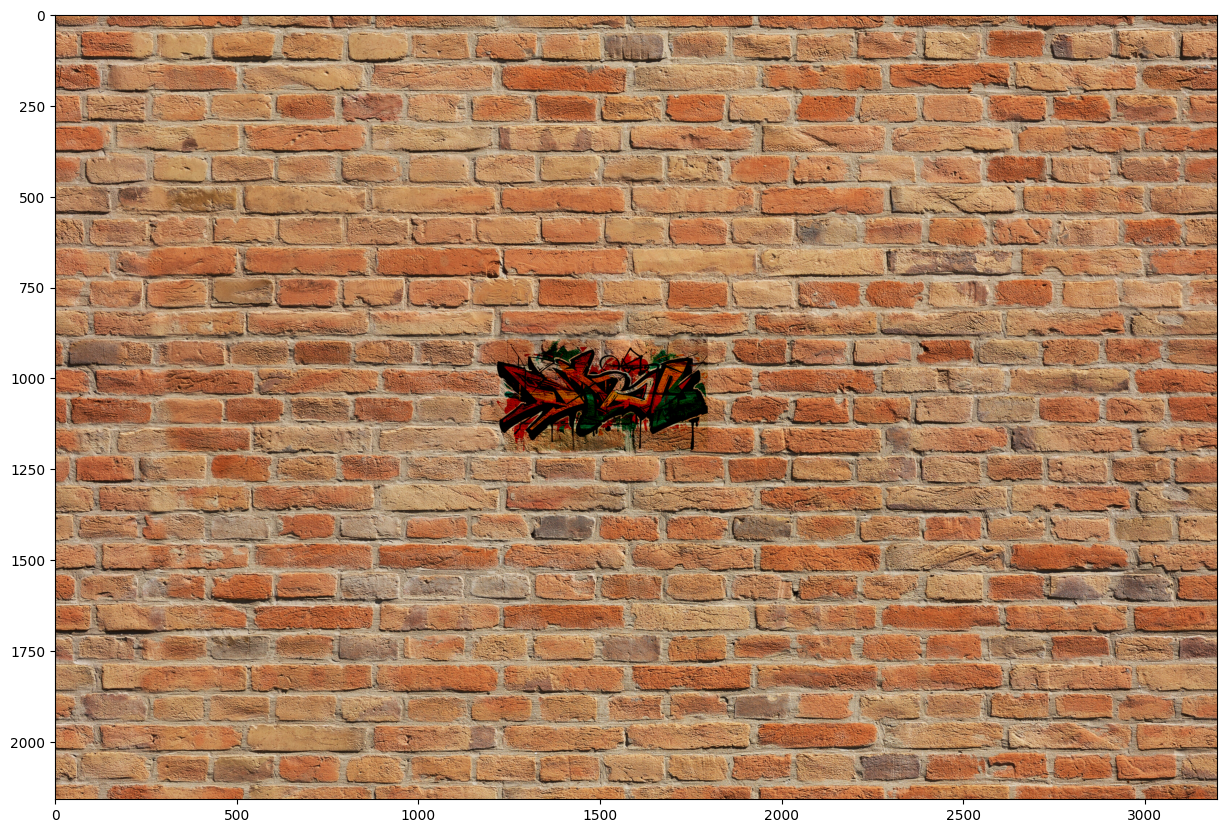

In [ ]:
im_mix = np.zeros(background_img.shape)
for b in np.arange(3):
  im_mix[:,:,b] = mixed_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)

plt.figure(figsize=(15,15))
plt.imshow(im_mix)

# Bells & Whistles (Extra Points)

## Color2Gray (20 pts)

In [ ]:
# method was assisted by GPT
from skimage.color import rgb2gray
def color2gray(img):
    gray_img = rgb2gray(img)
    im_h, im_w = gray_img.shape
    im2var = np.arange(im_h * im_w).reshape(im_h, im_w)

    # Initialize equation count and matrix
    num_eq = im_h * (im_w - 1) + (im_h - 1) * im_w + 1
    A = scipy.sparse.lil_matrix((num_eq, im_h * im_w))
    b = np.zeros(num_eq)

    e = -1  # equation counter

    # Step 2: Add horizontal gradient equations
    for y in range(im_h):
        for x in range(im_w - 1):
            # Grayscale gradient
            gray_gradient = gray_img[y, x + 1] - gray_img[y, x]

            # RGB gradients
            r_gradient = img[y, x + 1, 0] - img[y, x, 0]
            g_gradient = img[y, x + 1, 1] - img[y, x, 1]
            b_gradient = img[y, x + 1, 2] - img[y, x, 2]

            # Choose the largest absolute gradient
            max_gradient = max((gray_gradient, r_gradient, g_gradient, b_gradient), key=abs)

            # Add equation to A and b
            e += 1
            A[e, im2var[y, x + 1]] = 1
            A[e, im2var[y, x]] = -1
            b[e] = max_gradient

    # Step 3: Add vertical gradient equations
    for y in range(im_h - 1):
        for x in range(im_w):
            # Grayscale gradient
            gray_gradient = gray_img[y + 1, x] - gray_img[y, x]

            # RGB gradients
            r_gradient = img[y + 1, x, 0] - img[y, x, 0]
            g_gradient = img[y + 1, x, 1] - img[y, x, 1]
            b_gradient = img[y + 1, x, 2] - img[y, x, 2]

            # Choose the largest absolute gradient
            max_gradient = max((gray_gradient, r_gradient, g_gradient, b_gradient), key=abs)

            # Add equation to A and b
            e += 1
            A[e, im2var[y + 1, x]] = 1
            A[e, im2var[y, x]] = -1
            b[e] = max_gradient

    A[e, im2var[0, 0]] = 1
    b[e] = gray_img[0, 0]

    A = A.tocsr()
    v = scipy.sparse.linalg.lsqr(A, b, atol=1e-8, btol=1e-8)[0]

    reconstructed_img = np.zeros((im_h, im_w))

    for y in range(im_h):
        for x in range(im_w):
            reconstructed_img[y, x] = v[im2var[y][x]]

    return reconstructed_img

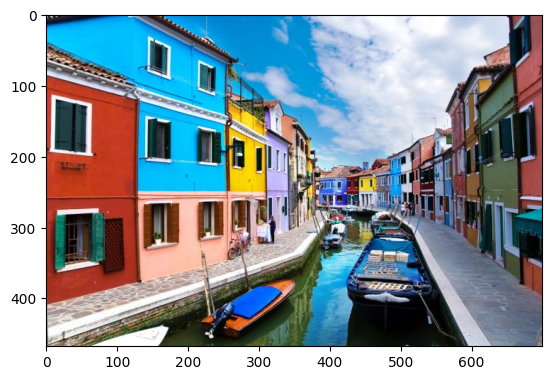

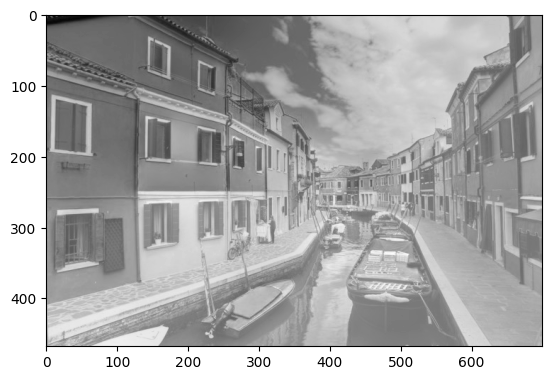

In [ ]:
color_img = cv2.cvtColor(cv2.imread('samples/contrast.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0

plt.imshow(color_img)
plt.show()

res = color2gray(color_img)
plt.imshow(res, cmap='gray')

## Laplacian pyramid blending (20 pts)

In [ ]:
def laplacian_blend(object_img, object_mask, bg_img, bg_ul):
  # feel free to change input parameters
    pass

## More gradient domain processing (up to 20 pts)